Sylwia Zwolińska
# Grupowanie danych z Facebooka

#Agenda
1. Wczytanie bibliotek
2. Wczytanie danych
3. Przygotowanie funkcji potrzebnych do pózniejszego przetwarzania danych
4. Analiza skupień - drzewo hierarchiczne
5. Grupowanie metodą k-średnich
6. Porównanie metod

In [ ]:
#dane są dostępne pod linkiem
#https://www.kaggle.com/sheenabatra/facebook-data

#1. Wczytanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
from pandas.core.algorithms import unique

#2. Wczytanie danych

In [2]:
df = pd.read_csv('pseudo_facebook.csv')
df.head(3)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(99003, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [5]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [6]:
# wybranie kilku kolumn do dalszej analizy
df = df[['age', 'friend_count', 'likes']]

In [7]:
df.isnull().sum()

age             0
friend_count    0
likes           0
dtype: int64

In [8]:
# wybranie próbki ze zbioru danych
df_stand = df.sample(frac=.05, random_state=30)

In [9]:
df_stand.shape

(4950, 3)

In [10]:
#standaryzacja
standaryzacja = StandardScaler()
stand_data = standaryzacja.fit_transform(df_stand)

#3. Przygotowanie funkcji potrzebnych do pózniejszego przetwarzania danych

In [11]:
# rysowanie wykresu silhouette dla k-klastrów

def draw_silhouette(km_model, data=stand_data):
  model = km_model
  visualizer = SilhouetteVisualizer(model)
  visualizer.fit(data)    # Fit the data to the visualizer
  visualizer.poof() 

In [12]:
#funkcja odpowiada za podział danych do k-klastrów

def kmeans_making(num_clust, data=stand_data):
  km = KMeans(n_clusters=num_clust,
            init='random',
            n_init=10, 
            max_iter=250,
           random_state=42)
  y = km.fit_predict(data)
  return km, y

In [13]:
# rysowanie wykresu dla trzech wymiarów danych
def draw_3d_plot(d_frame):
  colors = ['green', 'orange', 'blue', 'magenta', 'yellow', 'red']
  unique_labels = d_frame['cluster'].unique()
  
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in unique_labels:
    ax.scatter(d_frame['age'][d_frame.cluster== i], d_frame["friend_count"][d_frame.cluster == i], d_frame["likes"][d_frame.cluster == i], c=colors[i], s=60, label=i)

  plt.xlabel("Age")
  plt.ylabel("Friends_count")
  ax.set_zlabel("Likes")
  ax.legend()
  plt.show()

In [14]:
#wyliczanie średniej i odchylenia standardowego dla danych w dataframe

def count_mean_std(d_frame):
  df_clstr = d_frame.groupby("cluster").agg([np.mean, np.std])
  return df_clstr

In [15]:
#rysowanie wykresu na podstawie średniej i odch. stand. dla każdej grupy klastrów i każdej kolumny

def prepare_data_to_mean_plot(d_frame):
  col_age = d_frame['age']
  col_friend = d_frame['friend_count']
  col_like = d_frame['likes']

  my_colors = ['green', 'orange', 'blue', 'magenta', 'yellow', 'red']

  #draw plots
  col_age.plot(kind = "barh", y = "mean", legend = False,
            title = "Avg Age", xerr = "std", color=my_colors)
  col_friend.plot(kind = "barh", y = "mean", legend = False,
            title = "Avg Friend_count", xerr = "std", color=my_colors)
  col_like.plot(kind = "barh", y = "mean", legend = False,
            title = "Avg Likes", xerr = "std", color=my_colors) 

#4. Analiza skupień - hierarchiczne drzewo

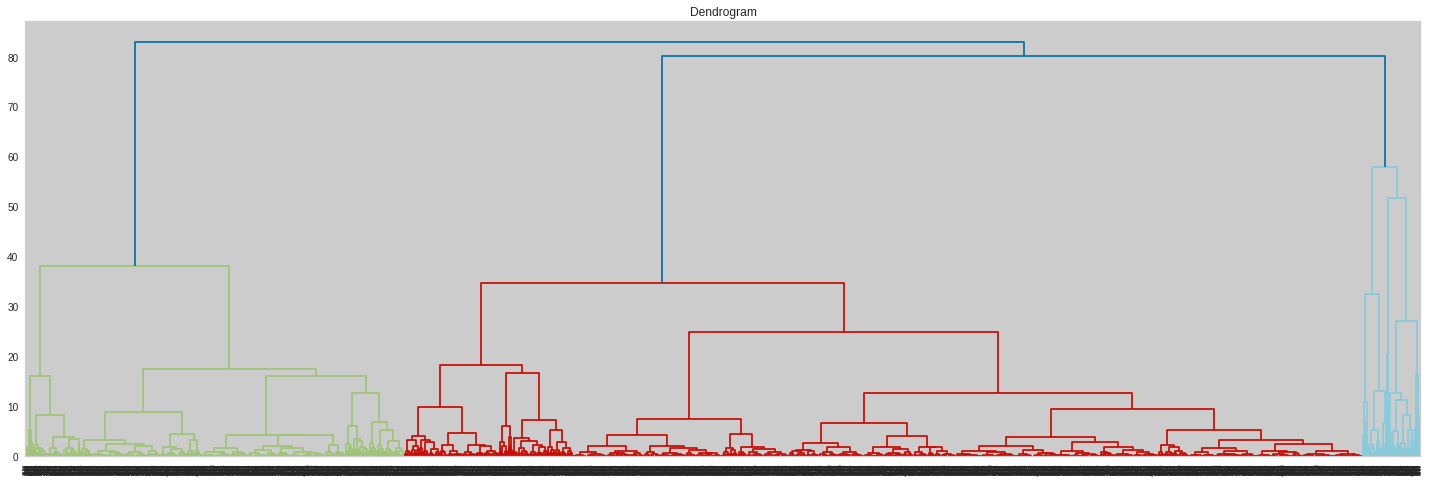

In [16]:
# rysowanie wykresu hierarchicznego drzewa - hierarchical clustering
data = stand_data
plt.figure(figsize=(25, 8))  
plt.title('Dendrogram')
dendrogram = hc.dendrogram(hc.linkage(data, method = "ward")) #przetwarzanie zestandaryzowanych danych


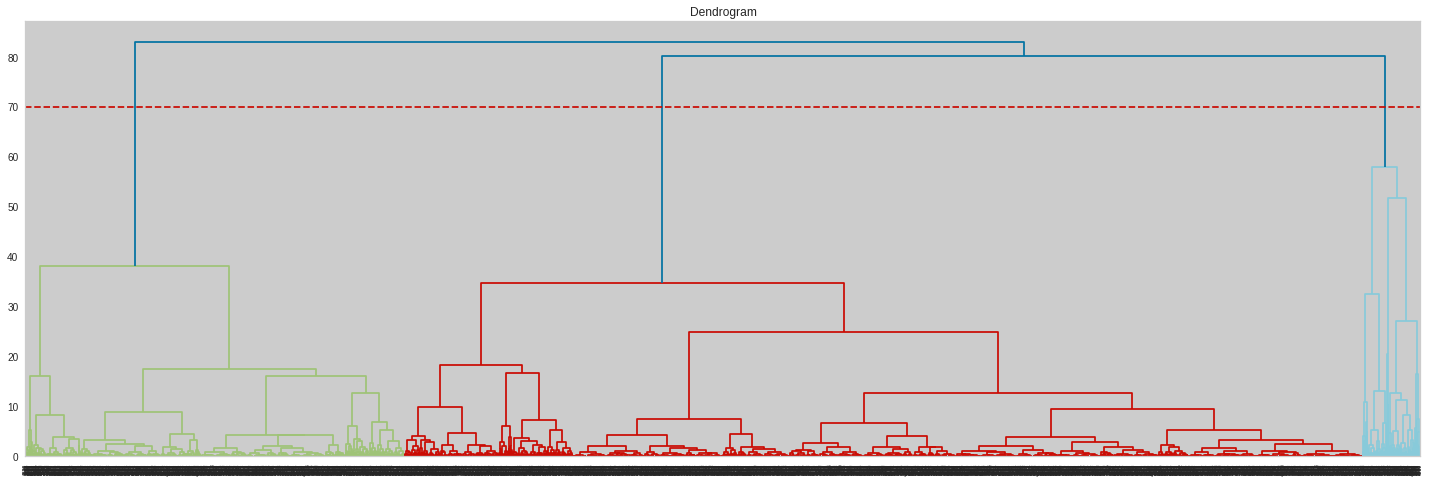

In [17]:
#wyznaczenie lini odniesenia na wykresie na poziomie 70
plt.figure(figsize=(25, 8))  
plt.title("Dendrogram")  
dend =  hc.dendrogram(hc.linkage(data, method  = "ward"))
plt.axhline(y=70, color='r', linestyle='--')

In [18]:
#obliczanie danych dla 3 grup za pomoca metody aglomeracyjnej
aglClust = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_aglClust = aglClust.fit_predict(stand_data)

aglClusters = df_stand.copy()
aglClusters['cluster'] = y_aglClust
aglClusters.head()

,age,friend_count,likes,cluster
2591,29,1,0,2
15557,43,17,416,1
55082,24,98,135,2
3345,23,1,2,2
66867,14,151,60,2


In [19]:
#liczba elementów w każdej z grup
Counter(aglClust.labels_)

Counter({0: 205, 1: 1346, 2: 3399})

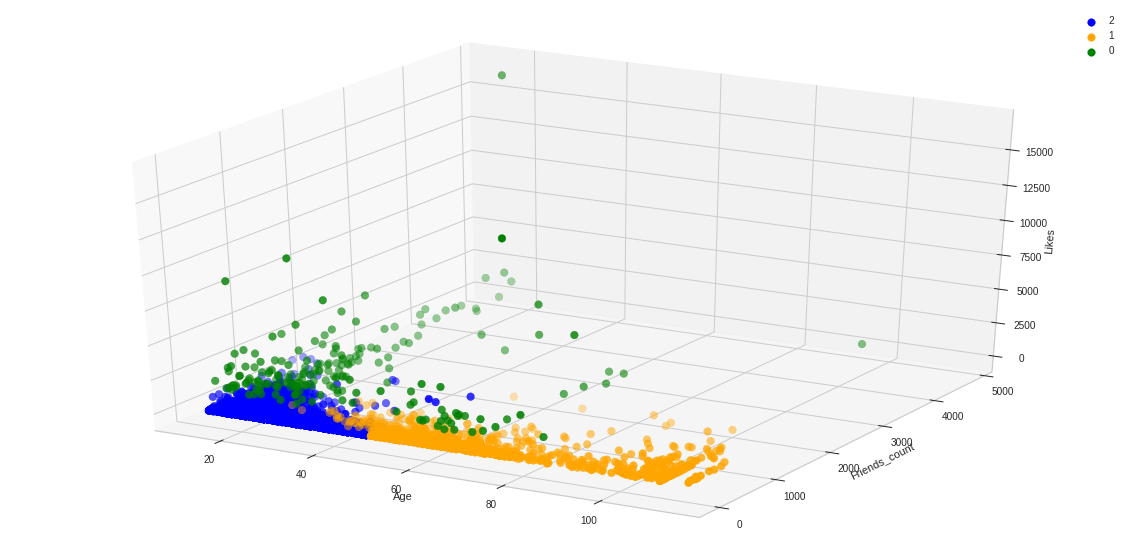

In [20]:
draw_3d_plot(aglClusters)

Na wykresie widać ułożenie elementów oraz ich przynależnośc do każdej z grup. Elementy z grupy 0 charakteryzuje większa ilośc Like'ów, grupa 1 dotyczy osób z przedziału wiekowego 40-100, a grupa 2 osób z przedziału wiekowego 15-40. W grupie 1 i 2 liczba znajomych waha się od 0-200, natomiast w przypadku zgrupowania 0 liczba znajomych jest rózna.

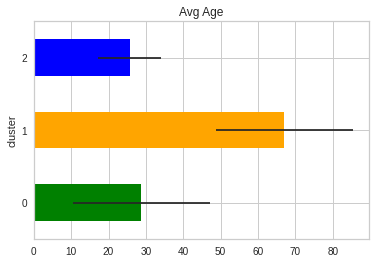

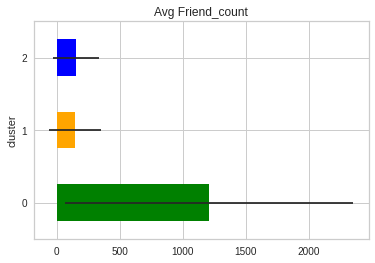

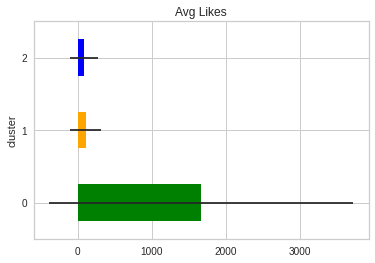

In [21]:
#obliczenie średnich wartosci i odch. stand.
df_ac = count_mean_std(aglClusters)
prepare_data_to_mean_plot(df_ac)

#5. Grupowanie metodą k-średnich

In [23]:
#k-means
#testowanie dla różnej liczby klastrów
wcss = []
for i in range (1,18):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(stand_data)
  wcss.append(kmeans.inertia_)

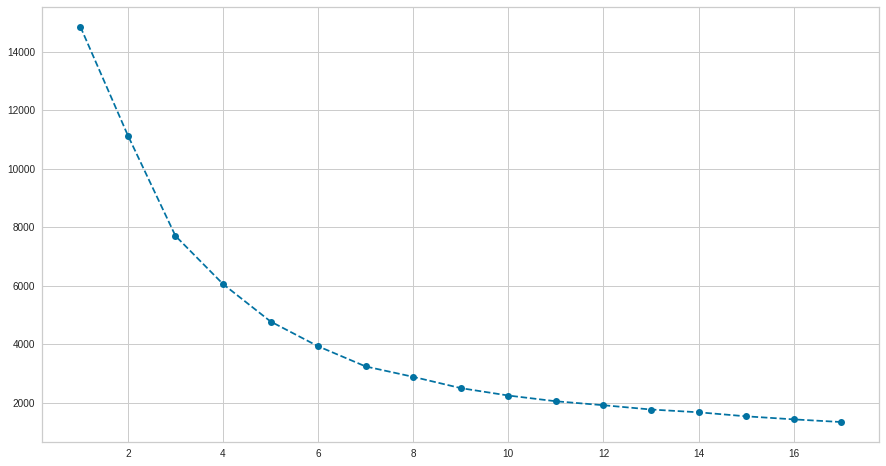

In [24]:
# wykres łokcia
plt.figure(figsize = (15,8))
plt.plot(range(1,18), wcss, marker='o', linestyle='--')
plt.show()

Osłabienie wykresu następuje w okolicy 3-4 klastra. Dlatego w poniższym kodzie obliczę, czy wartości silhouette dla wybranych wartości klastrów pokrywają się z danymi przedstawionymi na wykresie łokcia.

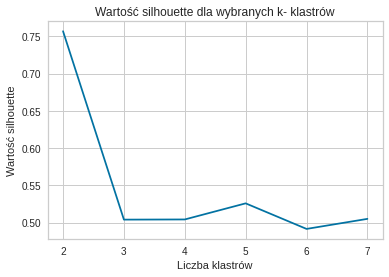

In [25]:
# wykres wartości silhouette dla wybranej liczby klastrów
n_clusters = [2, 3, 4, 5, 6,7]
silhouette_avg = []
for num_clusters in n_clusters:
 
 # inicjalizacja k-means
 kmeans_n = KMeans(n_clusters=num_clusters)
 kmeans_n.fit(stand_data)
 cluster_labels = kmeans_n.labels_
 
 # obliczenie wartości silhouette 
 silhouette_avg.append(silhouette_score(stand_data, cluster_labels))
plt.plot(n_clusters,silhouette_avg,'bx-')
plt.xlabel('Liczba klastrów') 
plt.ylabel('Wartość silhouette') 
plt.title('Wartość silhouette dla wybranych k- klastrów')
plt.show()

In [26]:
# wartości silhouette dla wybranej liczby klastrów
n_clusters = [2, 3, 4, 5, 6,7]
silhouette_sc = []
for num_clusters in n_clusters:
 
 # inicjalizacja k-means
 kmeans_s = KMeans(n_clusters=num_clusters)
 kmeans_s.fit(stand_data)
 cluster_labels = kmeans_s.labels_
 score = silhouette_score(stand_data, kmeans_s.labels_, metric='euclidean')
 print('Dla ', num_clusters, ' klastrów - wartość silhouette wynosi: %.3f' % score)


Dla  2  klastrów - wartość silhouette wynosi: 0.757
Dla  3  klastrów - wartość silhouette wynosi: 0.504
Dla  4  klastrów - wartość silhouette wynosi: 0.503
Dla  5  klastrów - wartość silhouette wynosi: 0.527
Dla  6  klastrów - wartość silhouette wynosi: 0.492
Dla  7  klastrów - wartość silhouette wynosi: 0.504


Patrząc na wykres wartości silhouette i powyższe obliczenia, można zobaczyć, że największą wartość silhouette uzyskało dla 2. klastrów. Kolejną wyższą wartością jest ta przy liczbie 5. klastrów. Dlatego poniżej zobaczę, czy rzeczywiście podział danych na 2 klastry jest lepszy od podziału na 5 klastrów.

# Grupowanie dla 2 klastrów

In [29]:
kmean2, y_kmean2 = kmeans_making(2)
#liczność klastrów
Counter(kmean2.labels_)

Counter({0: 148, 1: 4802})

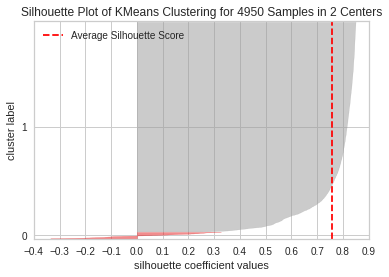

In [30]:
draw_silhouette(kmean2)

Jak widać na wykresie, dane z klastra 1 zostały dobrze zaklasyfikowane, natomiast klaster 0 posiada wartosci, ktore odbiegają od średniej, przez co mozna sądzić, że są to wartości odstające.

In [31]:
#przypisanie numeru klastra do danych
two_clust = df_stand.copy()
two_clust['cluster'] = y_kmean2
two_clust.head()

,age,friend_count,likes,cluster
2591,29,1,0,1
15557,43,17,416,1
55082,24,98,135,1
3345,23,1,2,1
66867,14,151,60,1


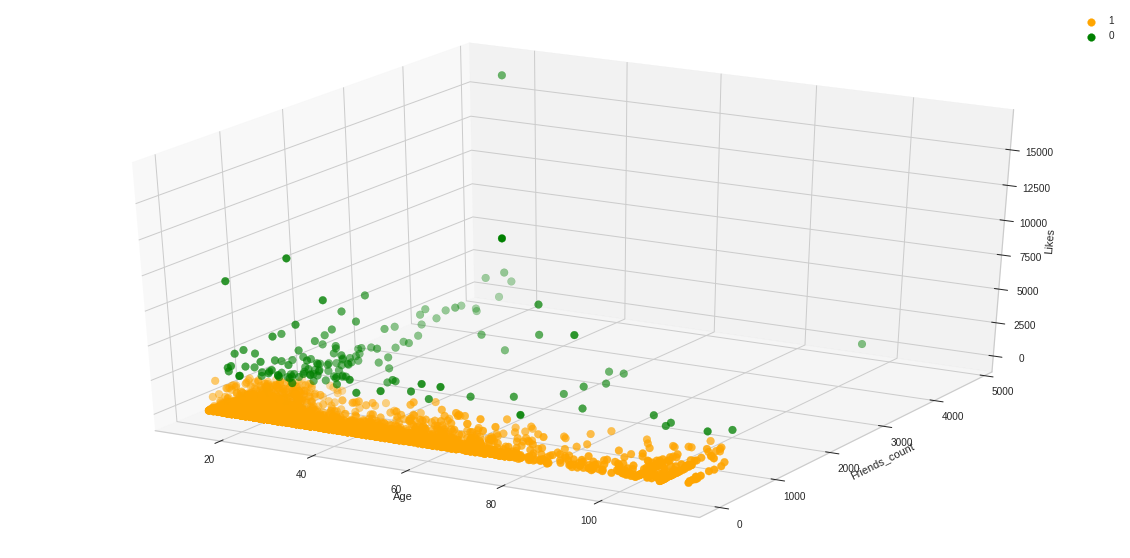

In [32]:
draw_3d_plot(two_clust)

Na wykresie wyrażnie widać rozróżnienie obu klastrów. 

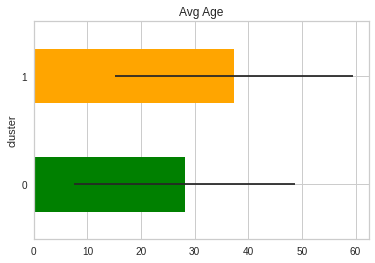

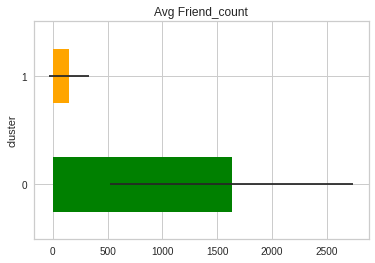

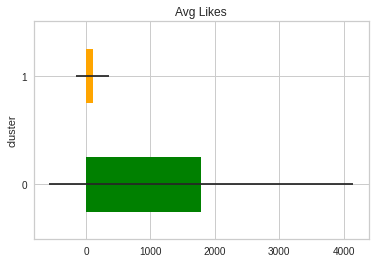

In [33]:
#obliczanie średnich dla każdej kolumny
df_2 = count_mean_std(two_clust)
prepare_data_to_mean_plot(df_2)

Wykresy średnich przedstawiają różnice między oboma klastrami. Klaster 0 ma niższą średnią wieku, natomiast elementy z tej grupy mają więcej Like'ów oraz znajomych. Grupa 1 to elemety, które mają mniej like'ów i znajomych, natomiast są starsze.

#Grupowanie dla 5 klastrów

In [34]:
kmean5, y_kmean5 = kmeans_making(5)
Counter(kmean5.labels_)

Counter({0: 9, 1: 83, 2: 3326, 3: 178, 4: 1354})

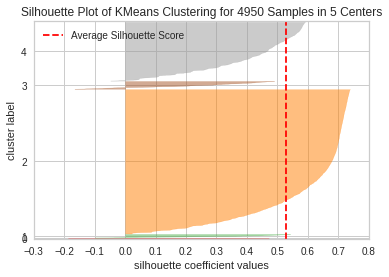

In [35]:
draw_silhouette(kmean5)

Tutaj najlepiej dopasowane elementy sa w klastrach 2 i 4. Pozostałe grupy sa mniej liczne i nieco odbiegają od średniej wartości silhouette.

In [36]:
#dopsaowanie klastra do elementu
five_clust = df_stand.copy()
five_clust['cluster'] = y_kmean5
five_clust.head()

,age,friend_count,likes,cluster
2591,29,1,0,2
15557,43,17,416,2
55082,24,98,135,2
3345,23,1,2,2
66867,14,151,60,2


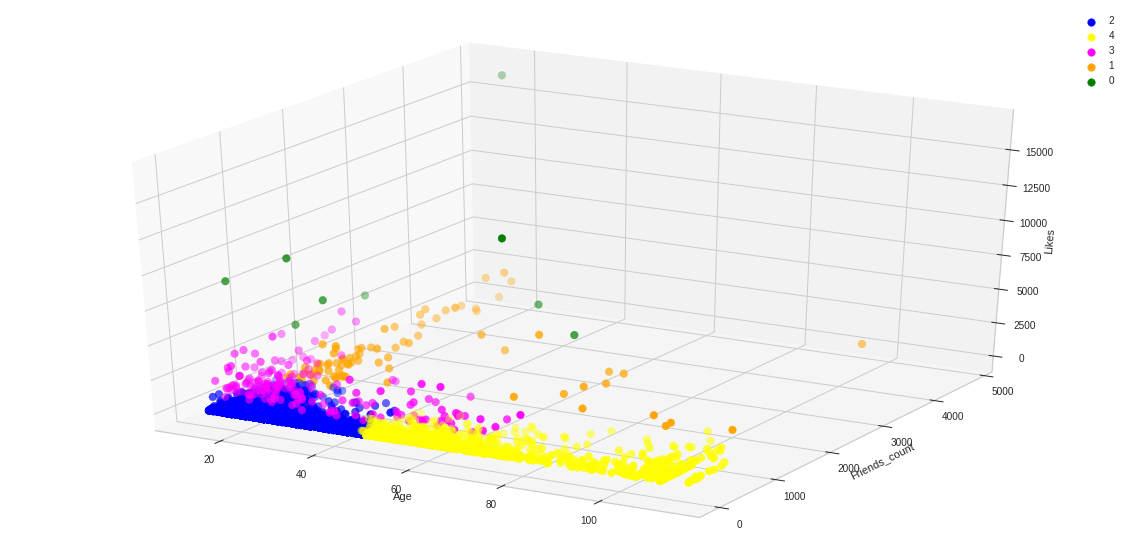

In [37]:
draw_3d_plot(five_clust)

W porównaniu z wykresem dla 2 klastrów, tutaj widac wiekszy podział elementów. 

In [38]:
#obliczenie średnich wartoci i odch. stand.
df_5 = count_mean_std(five_clust)
df_5.head()

age             ...        likes             
              mean        std  ...         mean          std
cluster                        ...                          
0        36.666667  23.032586  ...  8921.111111  3985.139252
1        27.975904  22.123256  ...   552.084337   687.492531
2        25.435057   8.236677  ...    63.362898   134.208428
3        30.230337  16.586285  ...  1687.634831   809.652779
4        66.923191  18.114851  ...    86.739291   168.076860

[5 rows x 6 columns]

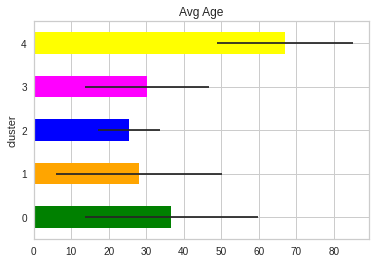

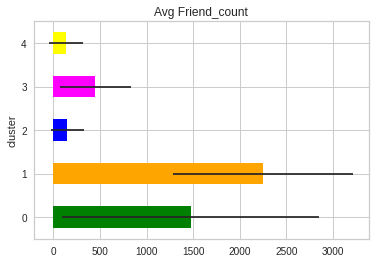

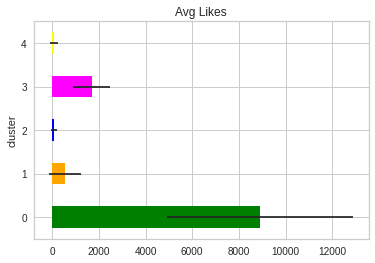

In [39]:
prepare_data_to_mean_plot(df_5)

Na poszczególnych wykresach widac różnice w średnich w kazdym skupieniu. Skupienie 4 przedstawia osoby dojrzale, które nie mają zbyt wielu likeów oraz znajomych. Skupienie 3 to osoby ok. 30 lat, które maja niewielu znajomych, ale mają ok 2000 like'ów. Grupa 2 to osoby ok 25 lat, które nie maja wielu znajomych i posiadaja znikomą wartość  like'ów. Grupa 1  to ludzie przed 30 rokiem życia, którzy mają najwięcej znajomych (w odniesienu do innych grup), natomiast nie mają wielku like'ów. Grupę 0 stanowią osoby ok. 40 lat, które mają wielu znajomych i najwięcej like'ów.

#Grupowanie dla 3 klastrów

Jako ostatni podział zastosuję podział danych na 3 klastry, ponieważ na tyle grup podzieliłam je w trakcie grupowania hierarchicznego.

In [40]:
# dla 3 klastrów
kmean3, y_kmean3 = kmeans_making(3)
Counter(kmean3.labels_)

Counter({0: 3392, 1: 1422, 2: 136})

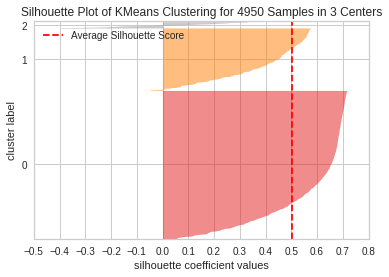

In [41]:
draw_silhouette(kmean3)

Tutaj widać, że elementy z grupy 0 zostały najlepiej dopasowane do klastrów. W grupie 2 występuje kilka ujemnych wartości.

In [43]:
# dopsaowanie grupy do elementu
three_clust = df_stand.copy()
three_clust['cluster'] = y_kmean3

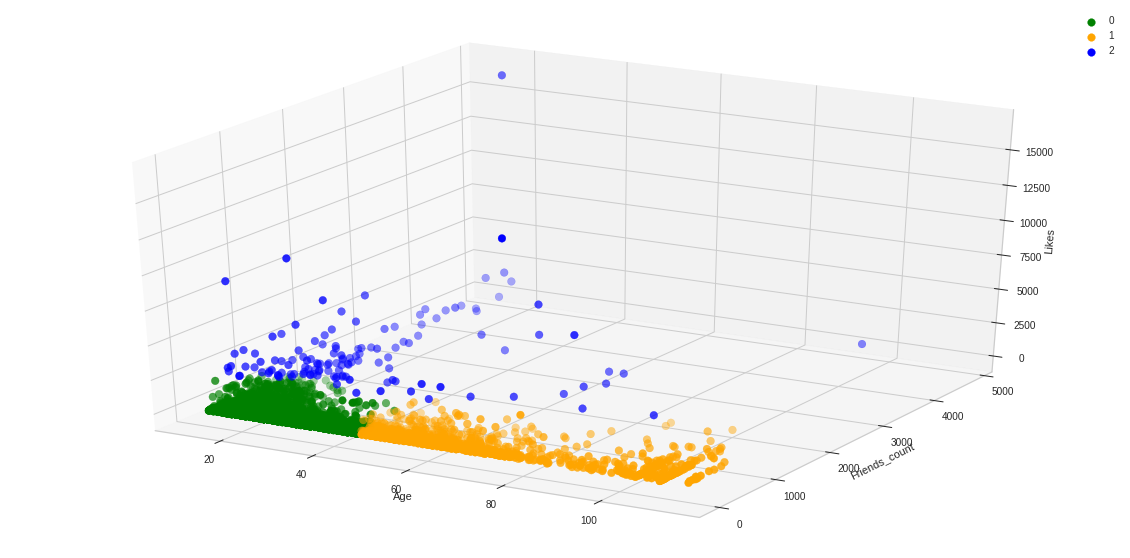

In [44]:
draw_3d_plot(three_clust)

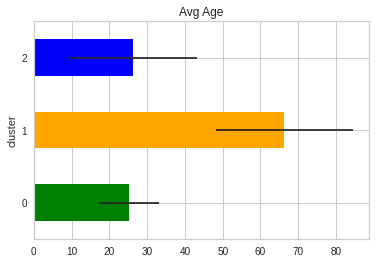

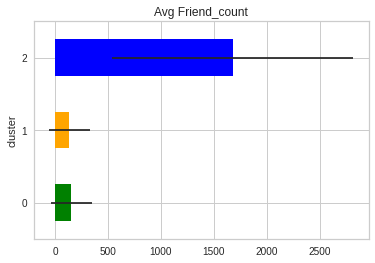

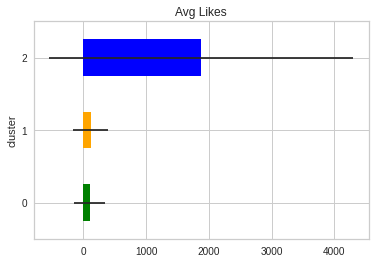

In [45]:
df_3 = count_mean_std(three_clust)
prepare_data_to_mean_plot(df_3)

W podziale na 3 klastry widać, że grupa 2 to osoby w wieku ok 25 lat, które mają najwiecej znajomych oraz najwięcej like'ów. Klaster 1 dotyczy dojrzałych osób, natomiast pozostałe wartości ma zbliżone do klastra 0.

#6. Porównanie hierarchicznego grupowania i grupowania k-średnich

Porównam podział danych metodą aglomeracyjną oraz metodą k-średnich. Oba przypadki dotyczyly podziału na 3 grupy, dlatego zamierzam zobaczyć, czy są miedzy nimi jakieś znaczące różnice.

In [48]:
# kopiowanie df z metody aglomeracyjnej
df_hc = aglClusters.copy()

In [49]:
# dopisanie znacznika do klastra
df_hc['cluster'] = df_hc['cluster'].map(str)
df_hc['cluster'] = df_hc['cluster'].apply(lambda x: x+"_hc")
df_hc.head()

,age,friend_count,likes,cluster
2591,29,1,0,2_hc
15557,43,17,416,1_hc
55082,24,98,135,2_hc
3345,23,1,2,2_hc
66867,14,151,60,2_hc


In [50]:
# kopiowanie df z k-means i dopisanie znacznika do klastra
df_km3 = three_clust.copy()
df_km3['cluster'] = df_km3['cluster'].map(str)
df_km3['cluster'] = df_km3['cluster'].apply(lambda x: x+"_km")
df_km3.head()

,age,friend_count,likes,cluster
2591,29,1,0,0_km
15557,43,17,416,0_km
55082,24,98,135,0_km
3345,23,1,2,0_km
66867,14,151,60,0_km


In [51]:
#połaczenie obu df
frames = [df_hc, df_km3]
result = pd.concat(frames)

In [52]:
result.shape

(9900, 4)

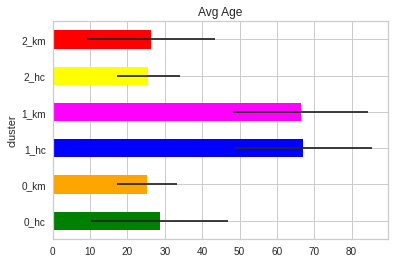

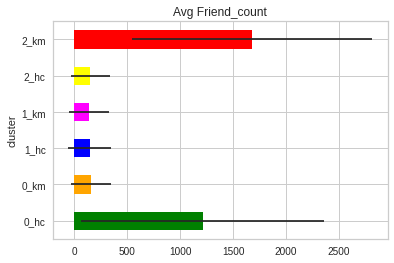

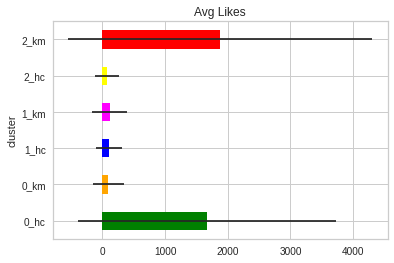

In [53]:
#wykresy średnich dla połaczonego df
df_join = count_mean_std(result)
prepare_data_to_mean_plot(df_join)

Jak widac na pierwszym wykresie, dane dotyczace wieku w obu przypadkach zostały podobnie zaklasyfikowane; nie ma znaczących różnic miedzy jedną a druga metodą klasyfikacji. Podobnie sytuacja prezentuje się na pozostałych wykresach, jednak grupy 0 i 2 występują zamiennie. 